# Video Game Sales Analysis

This notebook provides a comprehensive analysis of video game sales data, exploring sales patterns across different platforms, genres, publishers, and regions.

## Dataset Overview
The dataset contains video game sales data with the following columns:
- **Rank**: Sales ranking
- **Name**: Game title
- **Platform**: Gaming platform
- **Year**: Release year
- **Genre**: Game genre
- **Publisher**: Game publisher
- **Regional Sales**: NA_Sales, EU_Sales, JP_Sales, Other_Sales (in millions)
- **Global_Sales**: Total worldwide sales (in millions)


In [1]:
# Create figures directory if it doesn't exist
import os
os.makedirs('figures', exist_ok=True)
print("📁 Figures directory ready!")


📁 Figures directory ready!


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Dracula theme colors
BG_COLOR = '#282a36'  # Dark background
FG_COLOR = '#f8f8f2'  # Light foreground text
PURPLE   = '#BD93F9'  # Primary color
ORANGE   = '#FFB86C'  # Secondary color
PINK     = '#FF79C6'  # Tertiary color
GREEN    = '#50FA7B'  # Additional color
CYAN     = '#8BE9FD'  # Additional color

plt.rcParams.update(
    {
        "figure.facecolor": BG_COLOR,
        "axes.facecolor"  : BG_COLOR,
        "axes.edgecolor"  : FG_COLOR,
        "axes.labelcolor" : FG_COLOR,
        "xtick.color"     : FG_COLOR,
        "ytick.color"     : FG_COLOR,
        "text.color"      : FG_COLOR,
        "axes.prop_cycle" : plt.cycler(color=[PURPLE, ORANGE, PINK, CYAN, GREEN]),
        "grid.color"      : FG_COLOR,
        "grid.alpha"      : 0.3,
        "grid.linestyle"  : "--",
        "figure.figsize"  : (12, 8),
    }
)

def style_axes(ax, edgecolor=FG_COLOR, linewidth=1.2):
    ax.set_facecolor(BG_COLOR)
    ax.tick_params(colors=FG_COLOR)
    for spine in ax.spines.values():
        spine.set_color(FG_COLOR)
    for patch in ax.patches:
        if hasattr(patch, "get_facecolor"):
            face = patch.get_facecolor()
            patch.set_edgecolor(edgecolor or face)
            patch.set_linewidth(linewidth)

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('input-data/vgsales.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()


Dataset loaded successfully!
Dataset shape: (16598, 11)
Columns: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

First 5 rows:


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
df.tail()

Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16593  2002.0  Platform       Kemco      0.01      0.00       0.0   
16594  2003.0   Shooter  Infogrames      0.01      0.00       0.0   
16595  2008.0    Racing  Activision      0.00      0.00       0.0   
16596  2010.0    Puzzle    7G//AMES      0.00      0.01       0.0   
16597  2003.0  Platform     Wanadoo      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
16593          0.0          0.01  
16594          0.0          0.01  
16595          0.0          0.01  
16596          0.0          0.01  
16597          0.0          0.01

In [5]:
# Basic dataset information
print("=== 📊 DATASET INFORMATION 📊 ===")
print(f"🎮 Total number of games: {len(df):,}")
print(f"📅 Date range: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"🕹️ Unique platforms: {df['Platform'].nunique()}")
print(f"🎯 Unique genres: {df['Genre'].nunique()}")
print(f"🏢 Unique publishers: {df['Publisher'].nunique()}")

print("\n=== 📋 DATA TYPES 📋 ===")
print(df.dtypes)

print("\n=== ❓ MISSING VALUES ❓ ===")
print(df.isnull().sum())

print("\n=== 📈 BASIC STATISTICS 📈 ===")
df.describe()


=== 📊 DATASET INFORMATION 📊 ===
🎮 Total number of games: 16,598
📅 Date range: 1980 - 2020
🕹️ Unique platforms: 31
🎯 Unique genres: 12
🏢 Unique publishers: 578

=== 📋 DATA TYPES 📋 ===
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

=== ❓ MISSING VALUES ❓ ===
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

=== 📈 BASIC STATISTICS 📈 ===


Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

## Top Performers Analysis



In [6]:
# Top 10 best-selling games
print("=== TOP 10 BEST-SELLING GAMES ===")
top_games = df.nlargest(10, 'Global_Sales')[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]
for i, (_, game) in enumerate(top_games.iterrows(), 1):
    print(f"{i:2d}. {game['Name']} ({game['Platform']}, {game['Year']:.0f}) - {game['Global_Sales']:.2f}M")

print("\n=== TOP 10 PUBLISHERS BY TOTAL SALES ===")
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
for i, (publisher, sales) in enumerate(publisher_sales.items(), 1):
    print(f"{i:2d}. {publisher} - {sales:.2f}M")

print("\n=== TOP 10 PLATFORMS BY TOTAL SALES ===")
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
for i, (platform, sales) in enumerate(platform_sales.items(), 1):
    print(f"{i:2d}. {platform} - {sales:.2f}M")


=== TOP 10 BEST-SELLING GAMES ===
 1. Wii Sports (Wii, 2006) - 82.74M
 2. Super Mario Bros. (NES, 1985) - 40.24M
 3. Mario Kart Wii (Wii, 2008) - 35.82M
 4. Wii Sports Resort (Wii, 2009) - 33.00M
 5. Pokemon Red/Pokemon Blue (GB, 1996) - 31.37M
 6. Tetris (GB, 1989) - 30.26M
 7. New Super Mario Bros. (DS, 2006) - 30.01M
 8. Wii Play (Wii, 2006) - 29.02M
 9. New Super Mario Bros. Wii (Wii, 2009) - 28.62M
10. Duck Hunt (NES, 1984) - 28.31M

=== TOP 10 PUBLISHERS BY TOTAL SALES ===
 1. Nintendo - 1786.56M
 2. Electronic Arts - 1110.32M
 3. Activision - 727.46M
 4. Sony Computer Entertainment - 607.50M
 5. Ubisoft - 474.72M
 6. Take-Two Interactive - 399.54M
 7. THQ - 340.77M
 8. Konami Digital Entertainment - 283.64M
 9. Sega - 272.99M
10. Namco Bandai Games - 254.09M

=== TOP 10 PLATFORMS BY TOTAL SALES ===
 1. PS2 - 1255.64M
 2. X360 - 979.96M
 3. PS3 - 957.84M
 4. Wii - 926.71M
 5. DS - 822.49M
 6. PS - 730.66M
 7. GBA - 318.50M
 8. PSP - 296.28M
 9. PS4 - 278.10M
10. PC - 258.82M


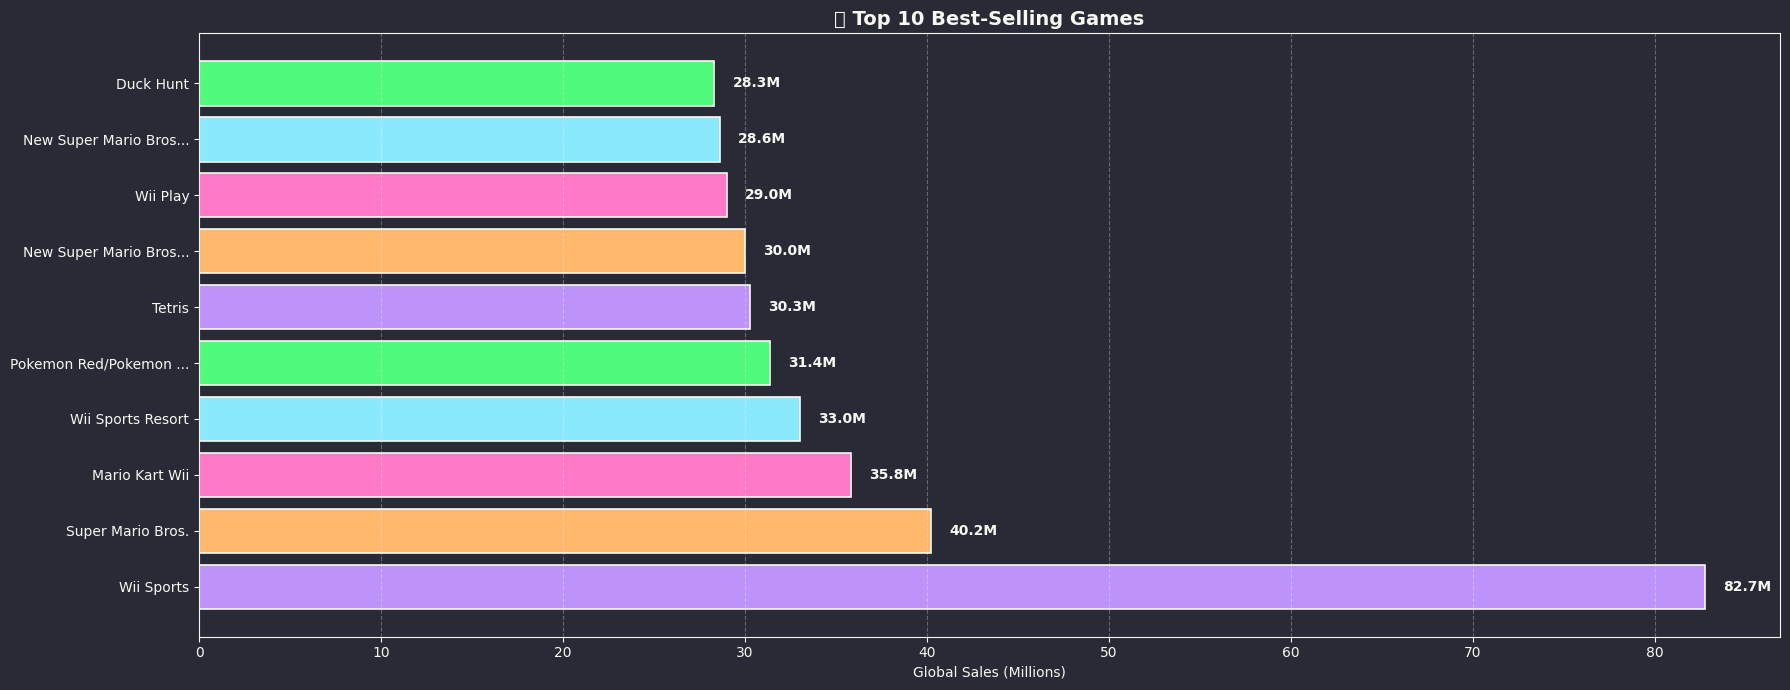

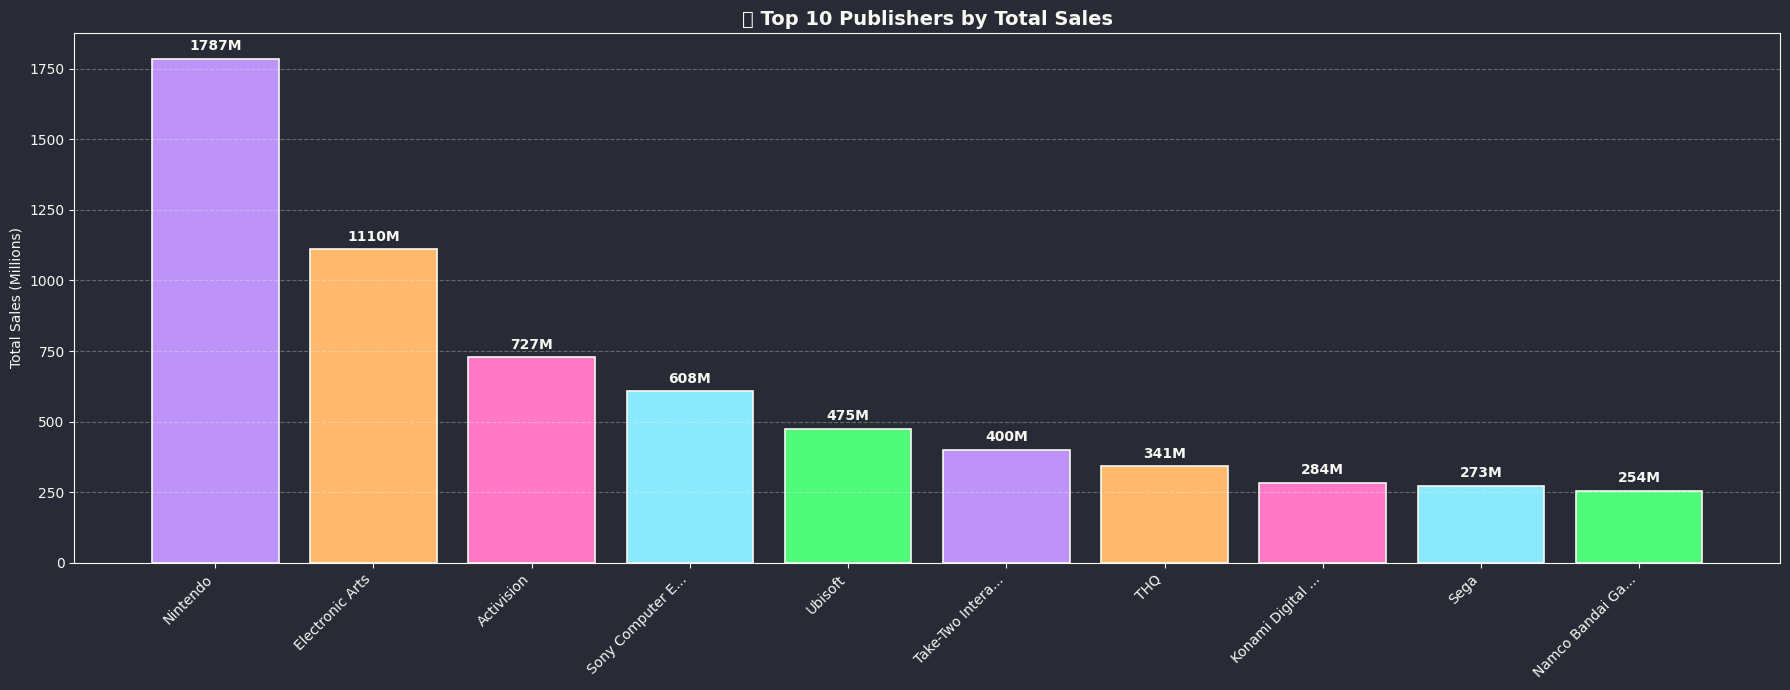

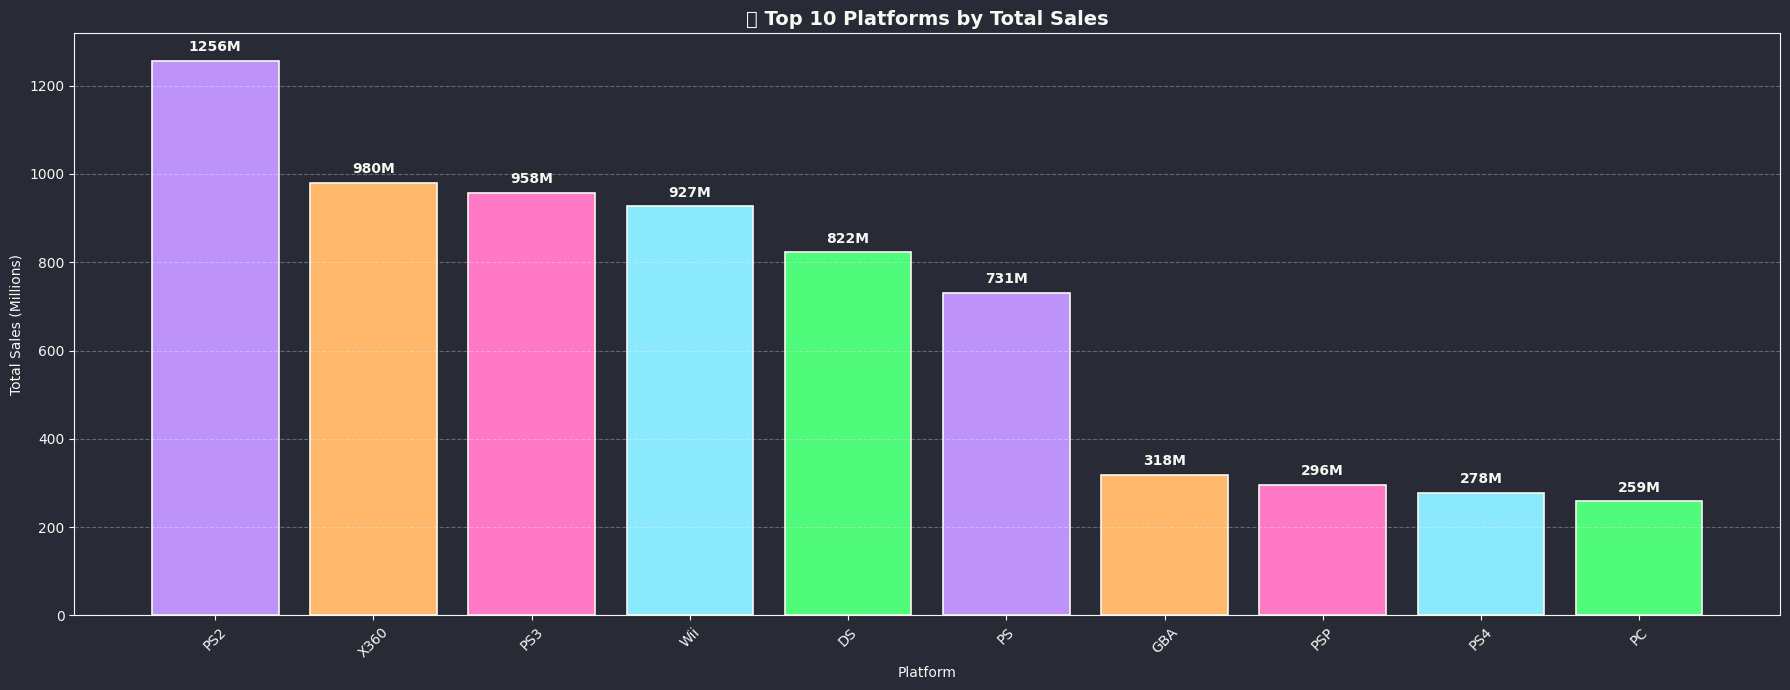

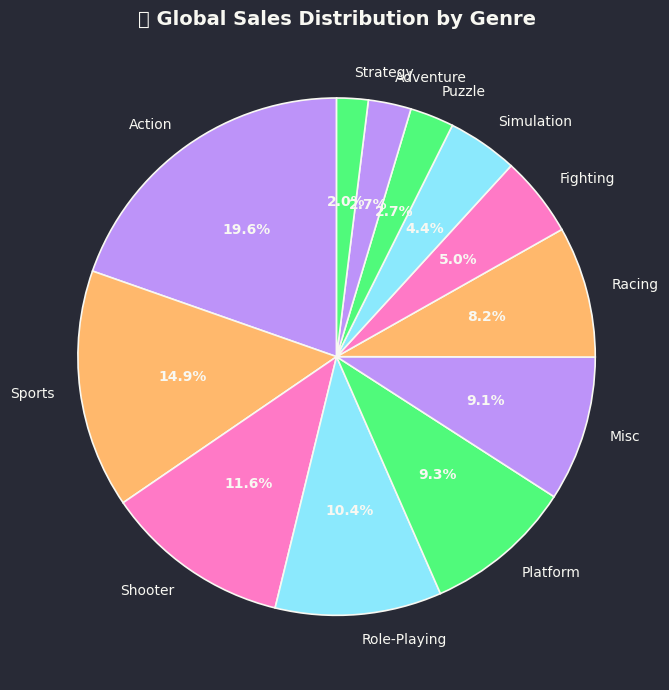

📊 TOP PERFORMERS SUMMARY STATISTICS 📊
🥇 Best-selling game: Wii Sports (82.74M sales)
🏆 Top publisher: Nintendo (1786.56M total sales)
🎮 Top platform: PS2 (1255.64M total sales)
🎯 Most popular genre: Action (1751.18M total sales)


In [7]:
# Visualizations for Top Performers Analysis

# 1. Top 10 Best-Selling Games
top_games = df.nlargest(10, 'Global_Sales')[['Name', 'Global_Sales']]
fig1, ax1 = plt.subplots(figsize=(18, 7))
colors_games = [PURPLE, ORANGE, PINK, CYAN, GREEN, PURPLE, ORANGE, PINK, CYAN, GREEN]
bars1 = ax1.barh(range(len(top_games)), top_games['Global_Sales'], color=colors_games)
ax1.set_yticks(range(len(top_games)))
ax1.set_yticklabels([name[:20] + '...' if len(name) > 20 else name for name in top_games['Name']])
ax1.set_xlabel('Global Sales (Millions)')
ax1.set_title('🎮 Top 10 Best-Selling Games', fontsize=14, fontweight='bold')
ax1.grid(axis='x')
# Add value labels
for i, (bar, value) in enumerate(zip(bars1, top_games['Global_Sales'])):
    ax1.text(value + 1, i, f'{value:.1f}M', va='center', fontweight='bold')
style_axes(ax1)
plt.tight_layout()
plt.savefig('figures/top_10_best_selling_games.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# 2. Top 10 Publishers by Total Sales
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
fig2, ax2 = plt.subplots(figsize=(18, 7))
colors_pub = [PURPLE, ORANGE, PINK, CYAN, GREEN] * 2
bars2 = ax2.bar(range(len(publisher_sales)), publisher_sales.values, color=colors_pub)
ax2.set_xticks(range(len(publisher_sales)))
ax2.set_xticklabels([pub[:15] + '...' if len(pub) > 15 else pub for pub in publisher_sales.index], rotation=45, ha='right')
ax2.set_ylabel('Total Sales (Millions)')
ax2.set_title('🏢 Top 10 Publishers by Total Sales', fontsize=14, fontweight='bold')
ax2.grid(axis='y')
# Add value labels
for bar, value in zip(bars2, publisher_sales.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{value:.0f}M', ha='center', va='bottom', fontweight='bold')
style_axes(ax2)
plt.tight_layout()
plt.savefig('figures/top_10_publishers_by_sales.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# 3. Top 10 Platforms by Total Sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
fig3, ax3 = plt.subplots(figsize=(18, 7))
colors_plat = [PURPLE, ORANGE, PINK, CYAN, GREEN] * 2
bars3 = ax3.bar(platform_sales.index, platform_sales.values, color=colors_plat)
ax3.set_xlabel('Platform')
ax3.set_ylabel('Total Sales (Millions)')
ax3.set_title('🕹️ Top 10 Platforms by Total Sales', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y')
# Add value labels
for bar, value in zip(bars3, platform_sales.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15, 
             f'{value:.0f}M', ha='center', va='bottom', fontweight='bold')
style_axes(ax3)
plt.tight_layout()
plt.savefig('figures/top_10_platforms_by_sales.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# 4. Sales Distribution by Genre (Pie Chart)
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
fig4, ax4 = plt.subplots(figsize=(18, 7))
colors_genre = [PURPLE, ORANGE, PINK, CYAN, GREEN, PURPLE, ORANGE, PINK, CYAN, GREEN, PURPLE, GREEN]
wedges, texts, autotexts = ax4.pie(genre_sales.values, labels=genre_sales.index, 
                                  autopct='%1.1f%%', colors=colors_genre, startangle=90)
ax4.set_title('🎯 Global Sales Distribution by Genre', fontsize=14, fontweight='bold')
# Make percentage text bold
for autotext in autotexts:
    autotext.set_fontweight('bold')
for text in texts:
    text.set_color(FG_COLOR)
style_axes(ax4)
plt.tight_layout()
plt.savefig('figures/sales_distribution_by_genre.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# Print summary statistics
print("=" * 60)
print("📊 TOP PERFORMERS SUMMARY STATISTICS 📊")
print("=" * 60)
print(f"🥇 Best-selling game: {top_games.iloc[0]['Name']} ({top_games.iloc[0]['Global_Sales']:.2f}M sales)")
print(f"🏆 Top publisher: {publisher_sales.index[0]} ({publisher_sales.iloc[0]:.2f}M total sales)")
print(f"🎮 Top platform: {platform_sales.index[0]} ({platform_sales.iloc[0]:.2f}M total sales)")
print(f"🎯 Most popular genre: {genre_sales.index[0]} ({genre_sales.iloc[0]:.2f}M total sales)")
print("=" * 60)

## Sales Trends Over Time


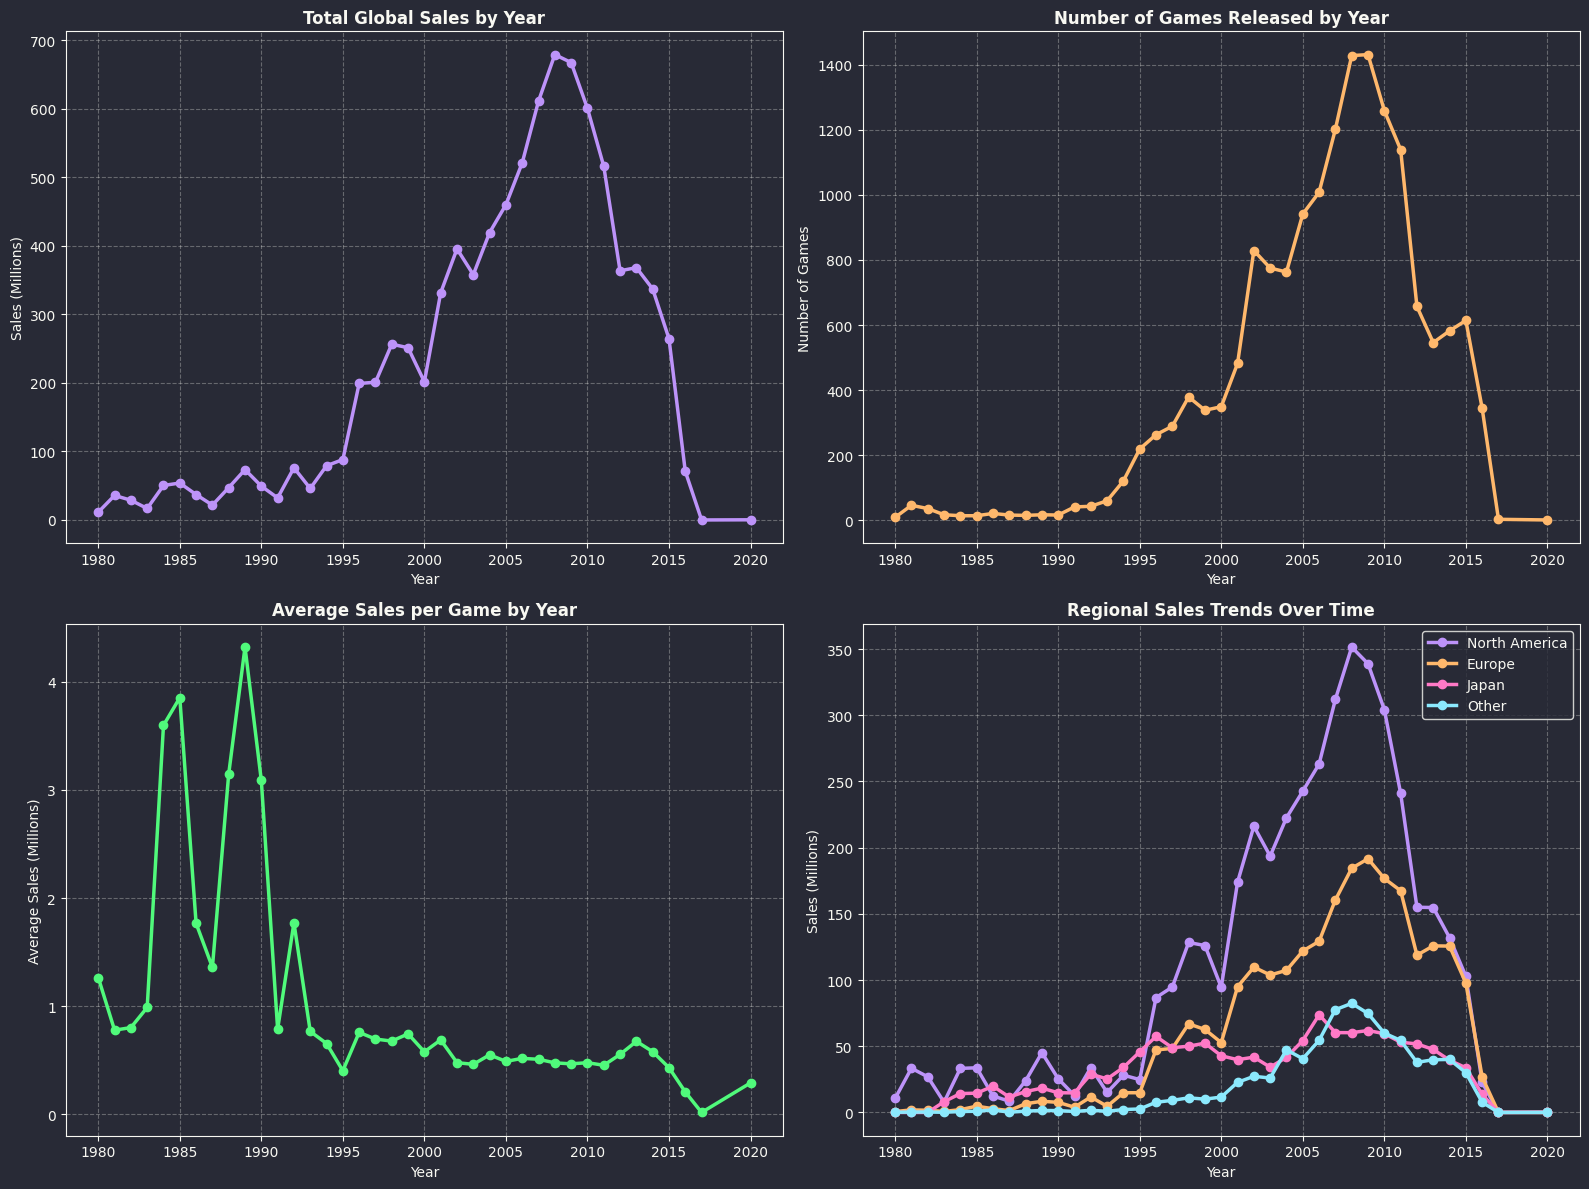

In [8]:
# Sales trends over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total sales by year
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
yearly_sales.plot(kind='line', ax=axes[0,0], marker='o', color=PURPLE, linewidth=2.5)
axes[0,0].set_title('Total Global Sales by Year', fontweight='bold')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Sales (Millions)')
axes[0,0].grid(True)
style_axes(axes[0,0])

# Number of games released by year
yearly_releases = df.groupby('Year').size()
yearly_releases.plot(kind='line', ax=axes[0,1], marker='o', color=ORANGE, linewidth=2.5)
axes[0,1].set_title('Number of Games Released by Year', fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Games')
axes[0,1].grid(True)
style_axes(axes[0,1])

# Average sales per game by year
yearly_avg = df.groupby('Year')['Global_Sales'].mean()
yearly_avg.plot(kind='line', ax=axes[1,0], marker='o', color=GREEN, linewidth=2.5)
axes[1,0].set_title('Average Sales per Game by Year', fontweight='bold')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Average Sales (Millions)')
axes[1,0].grid(True)
style_axes(axes[1,0])

# Regional sales trends
regional_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_sales.plot(kind='line', ax=axes[1,1], marker='o', 
                   color=[PURPLE, ORANGE, PINK, CYAN], linewidth=2.5)
axes[1,1].set_title('Regional Sales Trends Over Time', fontweight='bold')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Sales (Millions)')
axes[1,1].legend(['North America', 'Europe', 'Japan', 'Other'], 
                facecolor=BG_COLOR, edgecolor=FG_COLOR)
axes[1,1].grid(True)
style_axes(axes[1,1])

plt.tight_layout()
plt.savefig('figures/sales_trends_over_time.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()


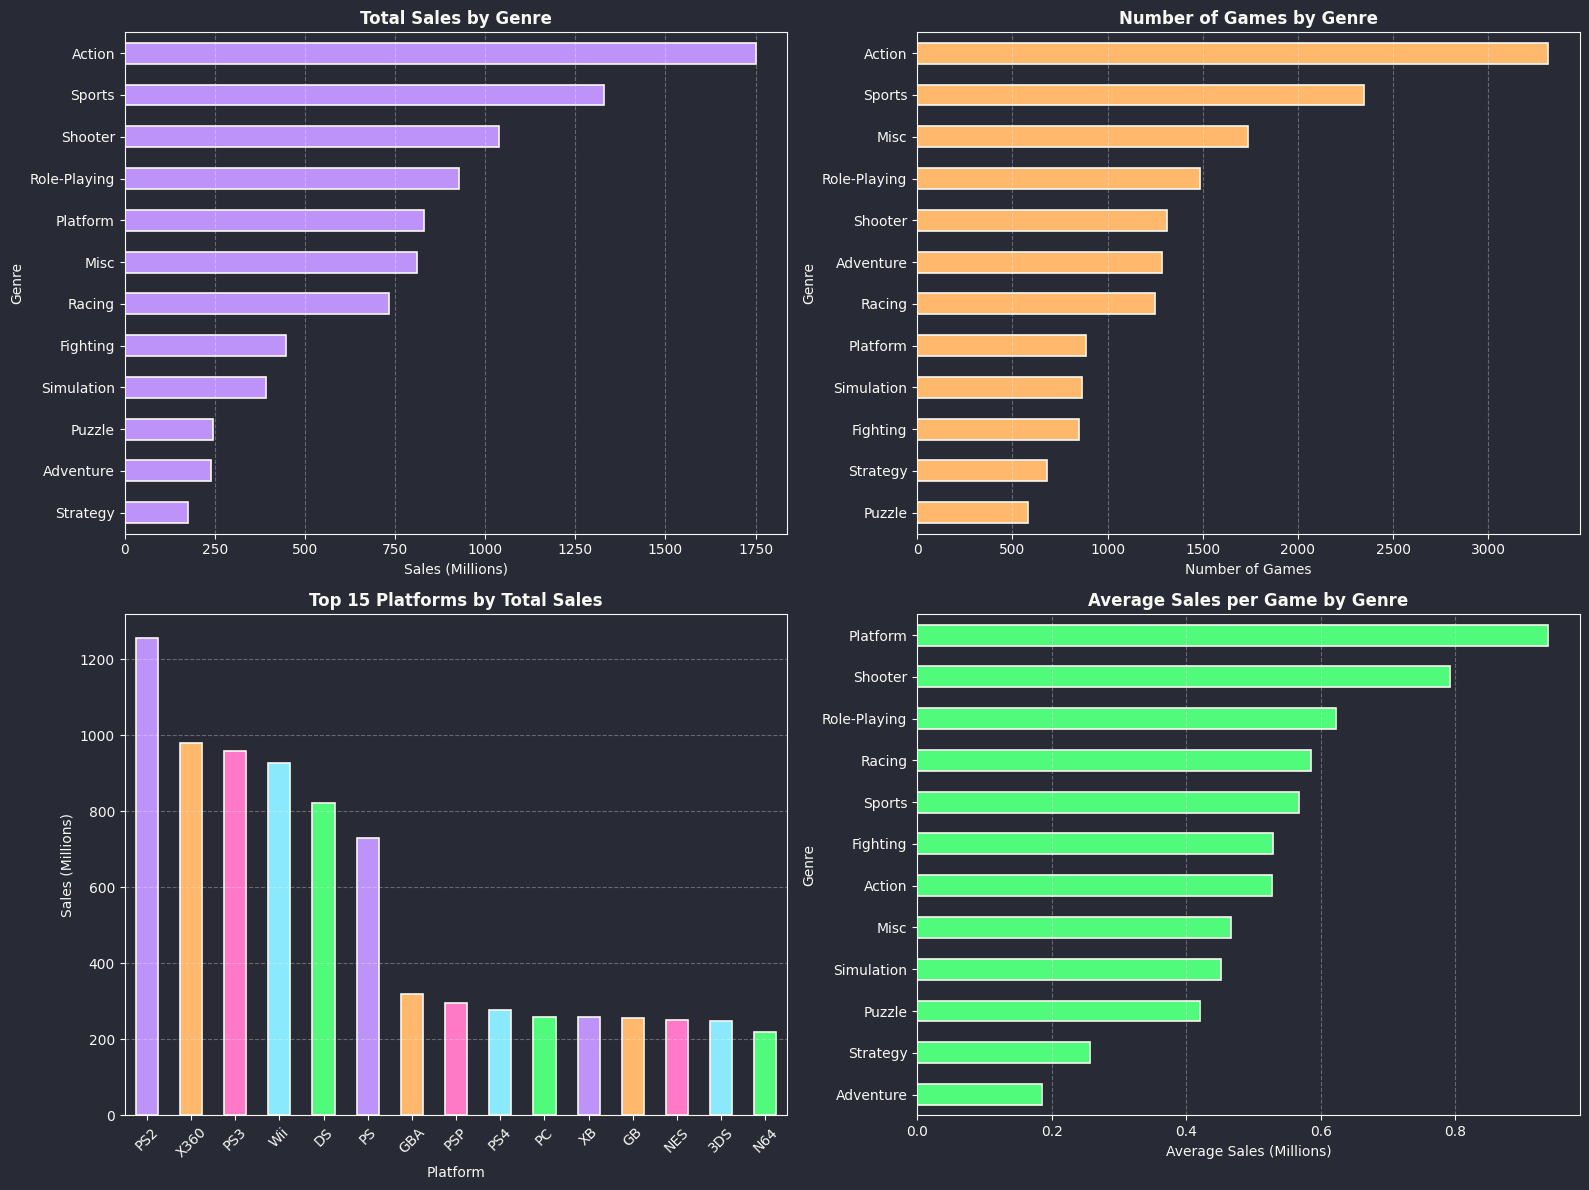

In [9]:
# Genre analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales by genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=True)
genre_sales.plot(kind='barh', ax=axes[0,0], color=PURPLE)
axes[0,0].set_title('Total Sales by Genre', fontweight='bold')
axes[0,0].set_xlabel('Sales (Millions)')
axes[0,0].grid(axis='x')
style_axes(axes[0,0])

# Number of games by genre
genre_count = df['Genre'].value_counts().sort_values(ascending=True)
genre_count.plot(kind='barh', ax=axes[0,1], color=ORANGE)
axes[0,1].set_title('Number of Games by Genre', fontweight='bold')
axes[0,1].set_xlabel('Number of Games')
axes[0,1].grid(axis='x')
style_axes(axes[0,1])

# Platform sales (top 15)
platform_sales_top = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)
platform_colors = [PURPLE, ORANGE, PINK, CYAN, GREEN] * 3
platform_sales_top.plot(kind='bar', ax=axes[1,0], color=platform_colors)
axes[1,0].set_title('Top 15 Platforms by Total Sales', fontweight='bold')
axes[1,0].set_xlabel('Platform')
axes[1,0].set_ylabel('Sales (Millions)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y')
style_axes(axes[1,0])

# Average sales by genre
genre_avg = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=True)
genre_avg.plot(kind='barh', ax=axes[1,1], color=GREEN)
axes[1,1].set_title('Average Sales per Game by Genre', fontweight='bold')
axes[1,1].set_xlabel('Average Sales (Millions)')
axes[1,1].grid(axis='x')
style_axes(axes[1,1])

plt.tight_layout()
plt.savefig('figures/genre_and_platform_analysis.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()


## Regional Sales Analysis


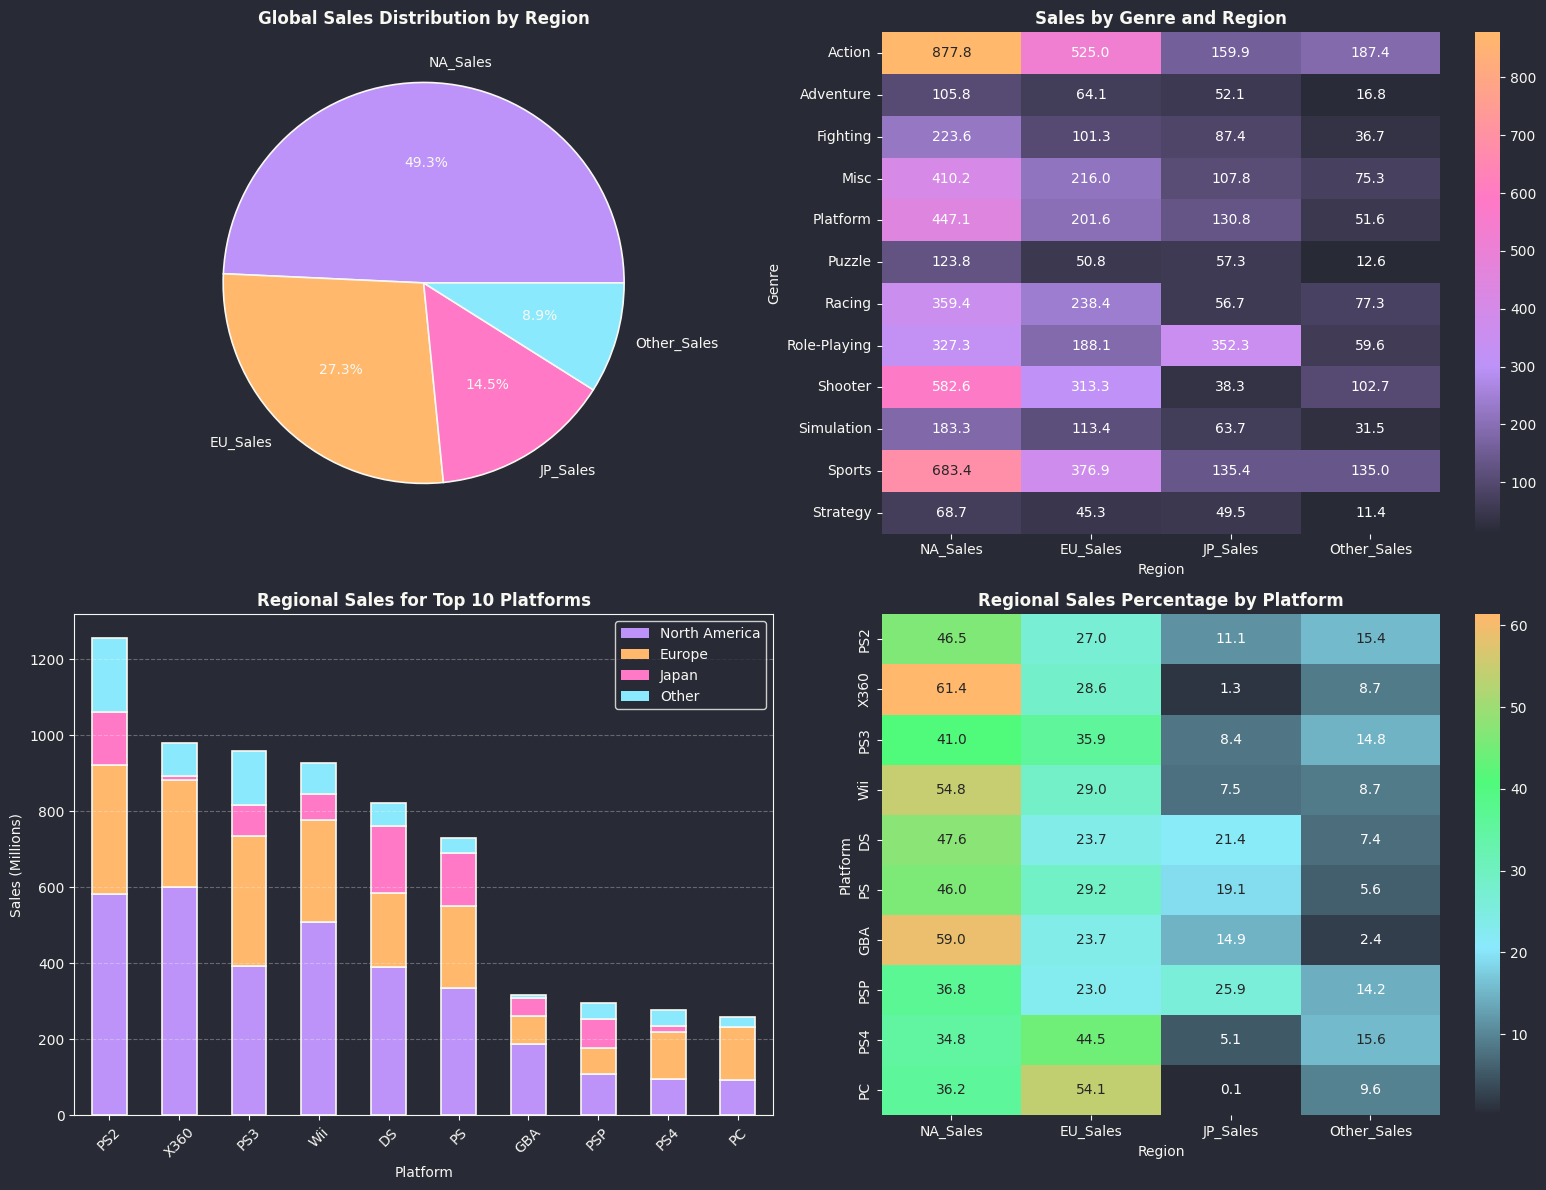

In [10]:
# Regional sales analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Regional sales distribution
regional_totals = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_totals.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', 
                    colors=[PURPLE, ORANGE, PINK, CYAN])
axes[0,0].set_title('Global Sales Distribution by Region', fontweight='bold')
axes[0,0].set_ylabel('')
style_axes(axes[0,0])

# Regional sales by genre (heatmap)
genre_regional = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# Create custom colormap for seaborn
import matplotlib.colors as mcolors
colors = [BG_COLOR, PURPLE, PINK, ORANGE]
cmap = mcolors.LinearSegmentedColormap.from_list("dracula", colors)
sns.heatmap(genre_regional, annot=True, fmt='.1f', cmap=cmap, ax=axes[0,1])
axes[0,1].set_title('Sales by Genre and Region', fontweight='bold')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Genre')
style_axes(axes[0,1])

# Top platforms by region
platform_regional = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
top_platforms_by_region = platform_regional.loc[platform_regional.sum(axis=1).nlargest(10).index]
top_platforms_by_region.plot(kind='bar', ax=axes[1,0], stacked=True, 
                            color=[PURPLE, ORANGE, PINK, CYAN])
axes[1,0].set_title('Regional Sales for Top 10 Platforms', fontweight='bold')
axes[1,0].set_xlabel('Platform')
axes[1,0].set_ylabel('Sales (Millions)')
axes[1,0].legend(['North America', 'Europe', 'Japan', 'Other'], 
                facecolor=BG_COLOR, edgecolor=FG_COLOR)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y')
style_axes(axes[1,0])

# Regional preferences (percentage breakdown)
regional_pct = platform_regional.div(platform_regional.sum(axis=1), axis=0) * 100
top_regional_pct = regional_pct.loc[platform_regional.sum(axis=1).nlargest(10).index]
colors2 = [BG_COLOR, CYAN, GREEN, ORANGE]
cmap2 = mcolors.LinearSegmentedColormap.from_list("dracula2", colors2)
sns.heatmap(top_regional_pct, annot=True, fmt='.1f', cmap=cmap2, ax=axes[1,1])
axes[1,1].set_title('Regional Sales Percentage by Platform', fontweight='bold')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Platform')
style_axes(axes[1,1])

plt.tight_layout()
plt.savefig('figures/regional_sales_analysis.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()


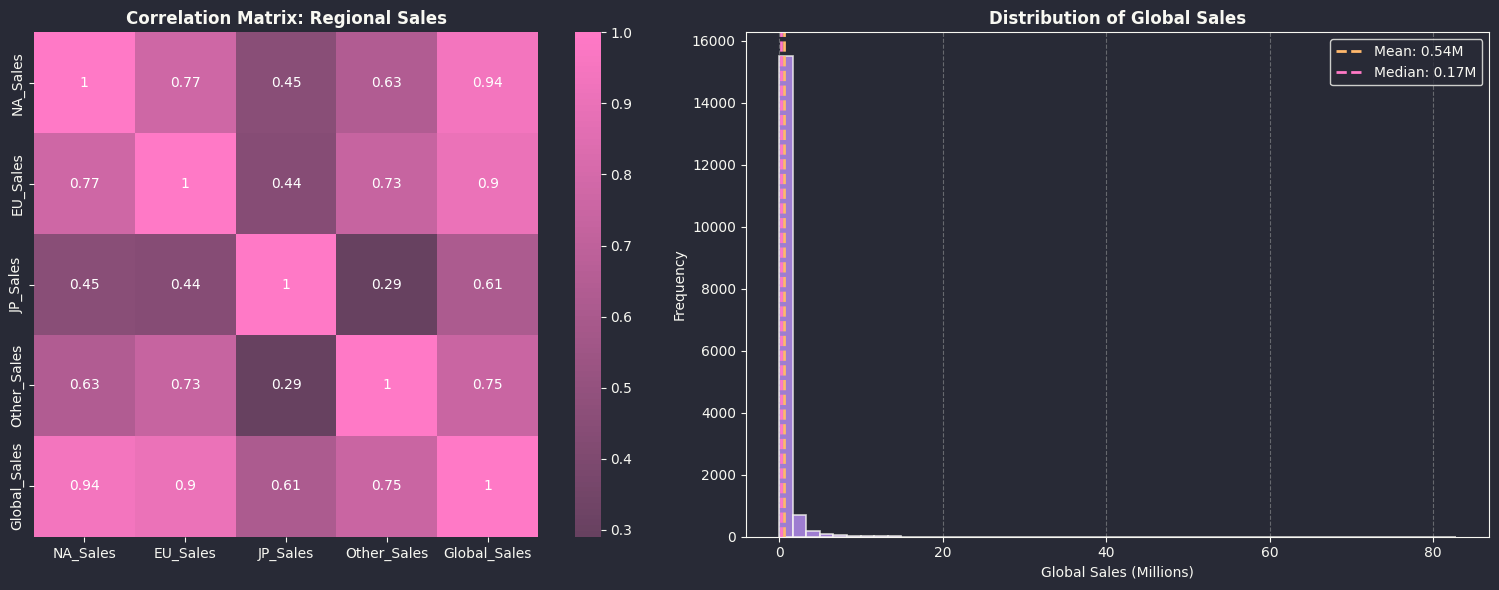

=== CORRELATION INSIGHTS ===
NA-EU Sales Correlation: 0.768
NA-JP Sales Correlation: 0.450
EU-JP Sales Correlation: 0.436

Mean Global Sales: 0.54M
Median Global Sales: 0.17M
Standard Deviation: 1.56M


In [11]:
# Correlation analysis between regional sales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation heatmap
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
correlation_matrix = df[sales_cols].corr()
# Create custom diverging colormap
colors_corr = [CYAN, BG_COLOR, PINK]
cmap_corr = mcolors.LinearSegmentedColormap.from_list("dracula_corr", colors_corr)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap_corr, center=0, 
            square=True, ax=axes[0])
axes[0].set_title('Correlation Matrix: Regional Sales', fontweight='bold')
style_axes(axes[0])

# Sales distribution
df['Global_Sales'].hist(bins=50, ax=axes[1], alpha=0.8, edgecolor=FG_COLOR, 
                       color=PURPLE)
axes[1].set_title('Distribution of Global Sales', fontweight='bold')
axes[1].set_xlabel('Global Sales (Millions)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['Global_Sales'].mean(), color=ORANGE, linestyle='--', linewidth=2,
                label=f'Mean: {df["Global_Sales"].mean():.2f}M')
axes[1].axvline(df['Global_Sales'].median(), color=PINK, linestyle='--', linewidth=2,
                label=f'Median: {df["Global_Sales"].median():.2f}M')
axes[1].legend(facecolor=BG_COLOR, edgecolor=FG_COLOR)
axes[1].grid(axis='y')
style_axes(axes[1])

plt.tight_layout()
plt.savefig('figures/correlation_analysis.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# Print some correlation insights
print("=== CORRELATION INSIGHTS ===")
print(f"NA-EU Sales Correlation: {correlation_matrix.loc['NA_Sales', 'EU_Sales']:.3f}")
print(f"NA-JP Sales Correlation: {correlation_matrix.loc['NA_Sales', 'JP_Sales']:.3f}")
print(f"EU-JP Sales Correlation: {correlation_matrix.loc['EU_Sales', 'JP_Sales']:.3f}")
print(f"\nMean Global Sales: {df['Global_Sales'].mean():.2f}M")
print(f"Median Global Sales: {df['Global_Sales'].median():.2f}M")
print(f"Standard Deviation: {df['Global_Sales'].std():.2f}M")


In [12]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# 🤖 Machine Learning: Random Forest Sales Prediction Model

## Overview
This section implements a **Random Forest Regressor** to predict global video game sales based on three key categorical features: **Platform**, **Genre**, and **Publisher**. The model provides insights into which factors are most influential in determining a game's commercial success.

## 📋 Model Specifications

### **Algorithm**: Random Forest Regressor
- **Type**: Ensemble learning method using multiple decision trees
- **Approach**: Regression (predicting continuous sales values)
- **Advantages**: 
  - Handles categorical features well
  - Robust to overfitting
  - Provides feature importance rankings
  - Can capture complex feature interactions

### **Features Used**:
- 🕹️ **Platform**: Gaming console/system (PS4, Xbox, Nintendo Switch, etc.)
- 🎯 **Genre**: Game category (Action, Sports, RPG, etc.)  
- 🏢 **Publisher**: Game publisher company (Nintendo, EA, Sony, etc.)

### **Target Variable**:
- 🌍 **Global_Sales**: Total worldwide sales in millions of copies

## 🔧 Data Processing Pipeline

1. **Data Cleaning**:
   - Remove games with missing publisher information
   - Handle missing values appropriately
   - Maintain data integrity

2. **Feature Encoding**:
   - Convert categorical variables to numerical using Label Encoding
   - Create mappings for all unique platforms, genres, and publishers

3. **Train/Test Split**:
   - 80% training data for model learning
   - 20% testing data for unbiased evaluation

4. **Model Training**:
   - 100 decision trees (n_estimators=100)
   - Maximum depth of 20 levels
   - Optimized hyperparameters for best performance

## 📊 Model Evaluation Metrics

The model performance is evaluated using multiple metrics:

- **R² Score**: Coefficient of determination (how well the model explains variance)
- **RMSE**: Root Mean Square Error (prediction accuracy in millions of sales)
- **MAE**: Mean Absolute Error (average prediction error)

## 📈 Visualizations Included

1. **Feature Importance Chart**: Shows which features matter most for predictions
2. **Predictions vs Actual**: Scatter plot showing model accuracy
3. **Residuals Plot**: Analysis of prediction errors and patterns
4. **Distribution Comparison**: Histogram comparing actual vs predicted sales

## 🎮 Practical Applications

The trained model can be used to:
- **Predict sales** for new game releases based on platform, genre, and publisher
- **Identify** which combinations of features lead to higher sales
- **Understand** the relative importance of platform vs genre vs publisher
- **Guide business decisions** for game development and marketing strategies

## 🔮 Example Use Cases

- Estimate potential sales for a new PlayStation action game by Sony
- Compare expected performance across different platforms
- Analyze the impact of publisher reputation on sales predictions
- Optimize game development strategies based on market insights

---

**Note**: The model is trained on historical data (1980-2020) and predictions should be interpreted alongside current market trends and conditions.


🤖 MACHINE LEARNING: PREDICTING GLOBAL SALES 🤖
🔧 Data Preparation:
   • Initial dataset size: 16,598 games
   • After removing missing publishers: 16,540 games
   • Features: ['Platform', 'Genre', 'Publisher']
   • Target: Global_Sales
   • Feature shapes - Platform: 31, Genre: 12, Publisher: 578

🔤 Encoding Categorical Variables:
   • Platform: 31 unique values encoded
   • Genre: 12 unique values encoded
   • Publisher: 578 unique values encoded

📊 Splitting Data:
   • Training set: 13,232 games
   • Testing set: 3,308 games

🌳 Training Random Forest Model:
   • Model training completed!

🎯 Making Predictions:
📈 MODEL PERFORMANCE METRICS 📈
🏋️ Training Performance:
   • R² Score: 0.3328
   • RMSE: 1.1486 million
   • MAE: 0.4137 million

🧪 Testing Performance:
   • R² Score: 0.1258
   • RMSE: 1.9200 million
   • MAE: 0.5236 million

🔍 Feature Importance:
   • Publisher: 0.3632
   • Platform: 0.3188
   • Genre: 0.3181


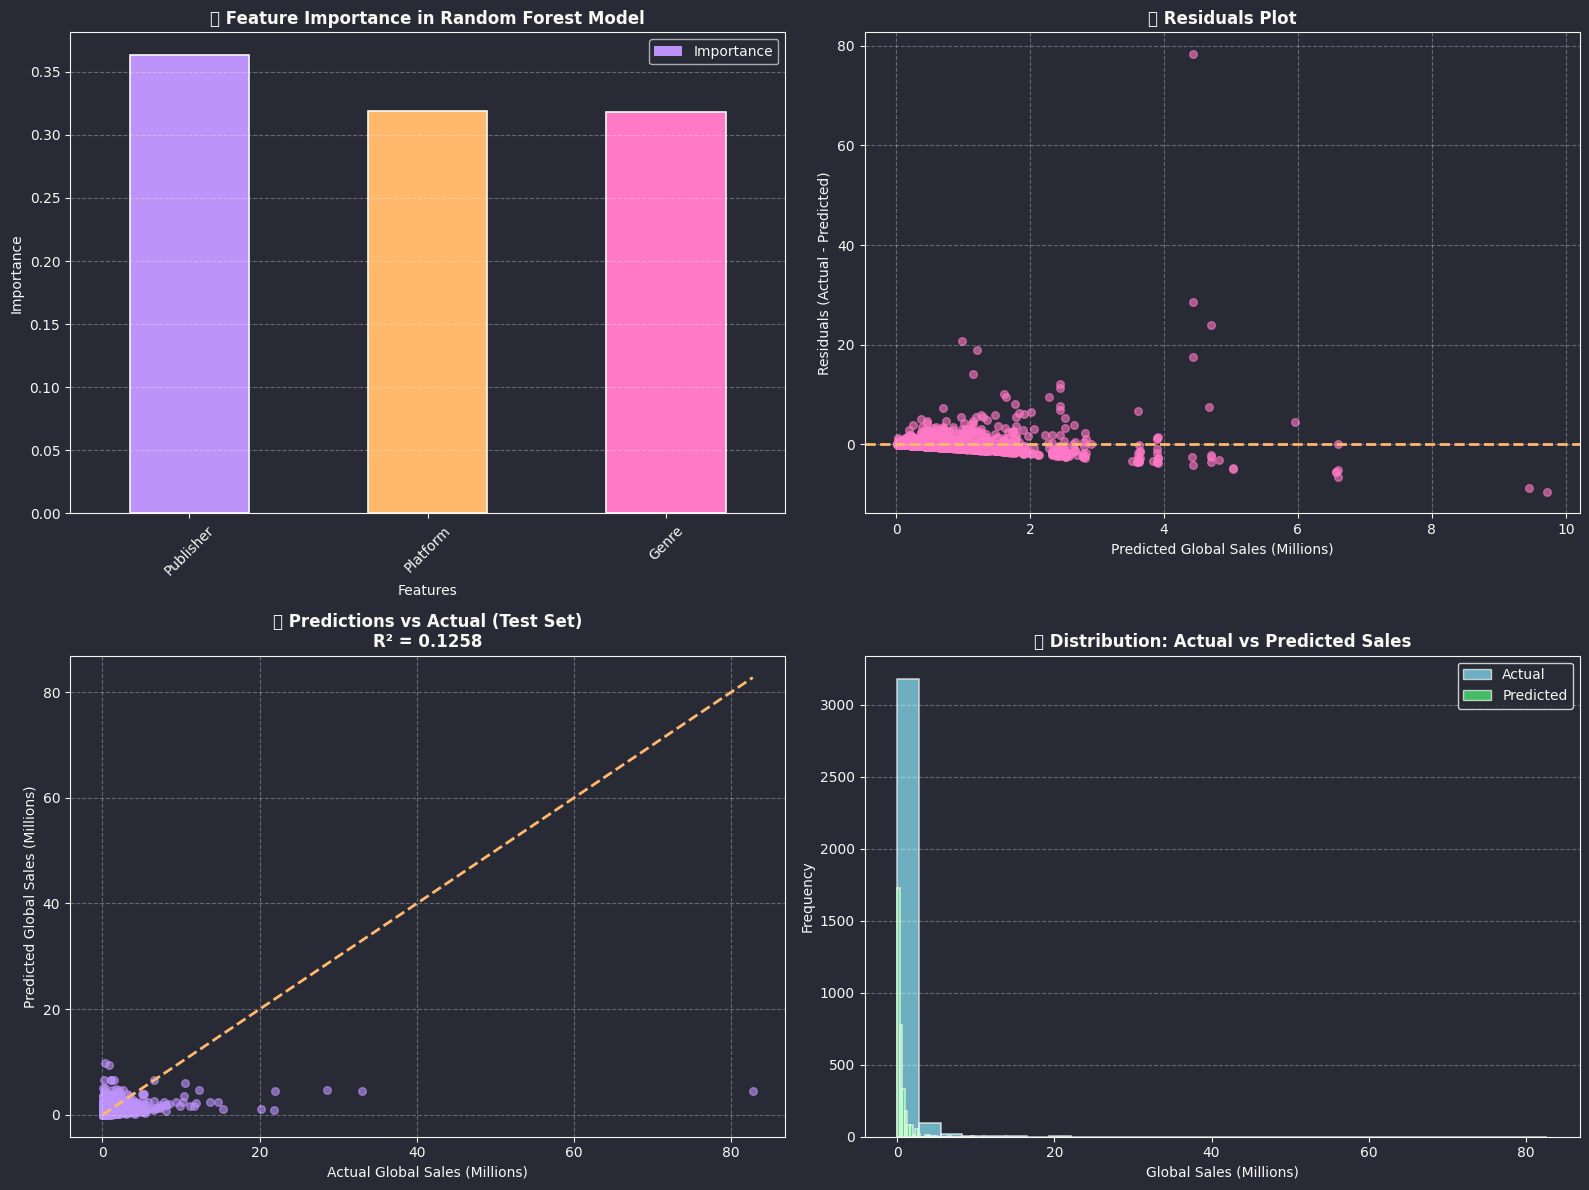


🎮 EXAMPLE PREDICTIONS 🎮
1. PS4 | Action | Sony Computer Entertainment
   Predicted Sales: 1.88 million copies

2. Switch | Platform | Nintendo
   Predicted Sales: 4.07 million copies

3. PC | Shooter | Electronic Arts
   Predicted Sales: 0.39 million copies

4. XOne | Sports | Electronic Arts
   Predicted Sales: 1.11 million copies

5. PS5 | Role-Playing | Square Enix
   Predicted Sales: 0.57 million copies

✅ Random Forest Model Training Complete!
💾 Model can predict global sales with R² = 0.1258
🔮 Use the model to predict sales for new games based on Platform, Genre, and Publisher!


In [13]:
# Machine Learning: Random Forest Model for Global Sales Prediction
# Import additional libraries for ML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from pathlib import Path

print("🤖 MACHINE LEARNING: PREDICTING GLOBAL SALES 🤖")
print("=" * 60)

# Prepare the data for ML
ml_df = df.copy()

# Handle missing values
print("🔧 Data Preparation:")
print(f"   • Initial dataset size: {len(ml_df):,} games")

# Remove rows with missing Publisher (since it's one of our features)
ml_df = ml_df.dropna(subset=['Publisher'])
print(f"   • After removing missing publishers: {len(ml_df):,} games")

# Fill missing Year values with median (though we're not using Year as a feature)
ml_df['Year'] = ml_df['Year'].fillna(ml_df['Year'].median())

# Select features and target
features = ['Platform', 'Genre', 'Publisher']
target = 'Global_Sales'

X = ml_df[features]
y = ml_df[target]

print(f"   • Features: {features}")
print(f"   • Target: {target}")
print(f"   • Feature shapes - Platform: {X['Platform'].nunique()}, Genre: {X['Genre'].nunique()}, Publisher: {X['Publisher'].nunique()}")

# Encode categorical variables
print("\n🔤 Encoding Categorical Variables:")
label_encoders = {}

X_encoded = X.copy()
for feature in features:
    le = LabelEncoder()
    X_encoded[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le
    print(f"   • {feature}: {len(le.classes_)} unique values encoded")

# Split the data
print("\n📊 Splitting Data:")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
print(f"   • Training set: {len(X_train):,} games")
print(f"   • Testing set: {len(X_test):,} games")

# Train Random Forest model
print("\n🌳 Training Random Forest Model:")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
print("   • Model training completed!")

out_dir = "artifacts"   
Path(out_dir).mkdir(parents=True, exist_ok=True)

# Save the model
joblib.dump(rf_model, f"{out_dir}/random_forest_model.pkl")

# Load the model
rf_model = joblib.load(f"{out_dir}/random_forest_model.pkl")

# Make predictions
print("\n🎯 Making Predictions:")
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("=" * 60)
print("📈 MODEL PERFORMANCE METRICS 📈")
print("=" * 60)
print(f"🏋️ Training Performance:")
print(f"   • R² Score: {train_r2:.4f}")
print(f"   • RMSE: {train_rmse:.4f} million")
print(f"   • MAE: {train_mae:.4f} million")
print(f"\n🧪 Testing Performance:")
print(f"   • R² Score: {test_r2:.4f}")
print(f"   • RMSE: {test_rmse:.4f} million")
print(f"   • MAE: {test_mae:.4f} million")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🔍 Feature Importance:")
for _, row in feature_importance.iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.4f}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Feature Importance Plot
feature_importance.plot(x='Feature', y='Importance', kind='bar', 
                       ax=axes[0,0], color=[PURPLE, ORANGE, PINK])
axes[0,0].set_title('🔍 Feature Importance in Random Forest Model', fontweight='bold')
axes[0,0].set_xlabel('Features')
axes[0,0].set_ylabel('Importance')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y')
style_axes(axes[0,0])

# 2. Predictions vs Actual (Test Set)
axes[1,0].scatter(y_test, y_pred_test, alpha=0.6, color=PURPLE, s=30)
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
               color=ORANGE, linewidth=2, linestyle='--')
axes[1,0].set_xlabel('Actual Global Sales (Millions)')
axes[1,0].set_ylabel('Predicted Global Sales (Millions)')
axes[1,0].set_title(f'🎯 Predictions vs Actual (Test Set)\nR² = {test_r2:.4f}', fontweight='bold')
axes[1,0].grid(True)
style_axes(axes[1,0])

# 3. Residuals Plot
residuals = y_test - y_pred_test
axes[0,1].scatter(y_pred_test, residuals, alpha=0.6, color=PINK, s=30)
axes[0,1].axhline(y=0, color=ORANGE, linestyle='--', linewidth=2)
axes[0,1].set_xlabel('Predicted Global Sales (Millions)')
axes[0,1].set_ylabel('Residuals (Actual - Predicted)')
axes[0,1].set_title('📊 Residuals Plot', fontweight='bold')
axes[0,1].grid(True)
style_axes(axes[0,1])

# 4. Distribution of Predictions vs Actual
axes[1,1].hist(y_test, bins=30, alpha=0.7, label='Actual', color=CYAN, edgecolor=FG_COLOR)
axes[1,1].hist(y_pred_test, bins=30, alpha=0.7, label='Predicted', color=GREEN, edgecolor=FG_COLOR)
axes[1,1].set_xlabel('Global Sales (Millions)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('📈 Distribution: Actual vs Predicted Sales', fontweight='bold')
axes[1,1].legend(facecolor=BG_COLOR, edgecolor=FG_COLOR)
axes[1,1].grid(axis='y')
style_axes(axes[1,1])

plt.tight_layout()
plt.savefig('figures/machine_learning_analysis.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# Example predictions for different combinations
print("\n🎮 EXAMPLE PREDICTIONS 🎮")
print("=" * 60)

# Create some example scenarios
examples = [
    {'Platform': 'PS4', 'Genre': 'Action', 'Publisher': 'Sony Computer Entertainment'},
    {'Platform': 'Switch', 'Genre': 'Platform', 'Publisher': 'Nintendo'},
    {'Platform': 'PC', 'Genre': 'Shooter', 'Publisher': 'Electronic Arts'},
    {'Platform': 'XOne', 'Genre': 'Sports', 'Publisher': 'Electronic Arts'},
    {'Platform': 'PS5', 'Genre': 'Role-Playing', 'Publisher': 'Square Enix'}
]

for i, example in enumerate(examples, 1):
    # Check if all values exist in our encoders
    try:
        encoded_example = []
        for feature in features:
            if example[feature] in label_encoders[feature].classes_:
                encoded_example.append(label_encoders[feature].transform([example[feature]])[0])
            else:
                # If platform/publisher doesn't exist, use most common one
                encoded_example.append(0)  # First encoded value (most common)
        
        prediction = rf_model.predict([encoded_example])[0]
        print(f"{i}. {example['Platform']} | {example['Genre']} | {example['Publisher']}")
        print(f"   Predicted Sales: {prediction:.2f} million copies")
        print()
    except Exception as e:
        print(f"{i}. Could not predict for {example} - some values not in training data")

print("=" * 60)
print("✅ Random Forest Model Training Complete!")
print(f"💾 Model can predict global sales with R² = {test_r2:.4f}")
print("🔮 Use the model to predict sales for new games based on Platform, Genre, and Publisher!")
print("=" * 60)


In [14]:
# Extract all Halo games from the dataset
print("🎮 HALO FRANCHISE ANALYSIS 🎮")
print("=" * 60)

# Filter for all Halo games
halo_games = df[df['Name'].str.contains('Halo', case=False, na=False)].copy()

print(f"📊 Total Halo games found: {len(halo_games)}")
print(f"🌍 Total Halo franchise sales: {halo_games['Global_Sales'].sum():.2f} million")
print(f"📅 Franchise span: {halo_games['Year'].min():.0f} - {halo_games['Year'].max():.0f}")

# Sort by Global Sales for analysis
halo_games_sorted = halo_games.sort_values('Global_Sales', ascending=False)

print("\n" + "=" * 60)
print("🏆 ALL HALO GAMES - SALES PERFORMANCE RANKING 🏆")
print("=" * 60)

for i, (_, game) in enumerate(halo_games_sorted.iterrows(), 1):
    platform_display = game['Platform']
    year_display = f"{game['Year']:.0f}" if pd.notna(game['Year']) else "Unknown"
    print(f"{i:2d}. {game['Name']}")
    print(f"    📱 Platform: {platform_display} | 📅 Year: {year_display}")
    print(f"    🌍 Global Sales: {game['Global_Sales']:.2f}M")
    print(f"    📊 Regional: NA={game['NA_Sales']:.2f}M | EU={game['EU_Sales']:.2f}M | JP={game['JP_Sales']:.2f}M | Other={game['Other_Sales']:.2f}M")
    print()

# Franchise statistics
print("=" * 60)
print("📈 HALO FRANCHISE STATISTICS 📈")
print("=" * 60)

# Separate main games from DLC/bundles for cleaner analysis
main_halo_games = halo_games[~halo_games['Name'].str.contains('Pack|Triple|Anniversary', case=False, na=False)]
dlc_games = halo_games[halo_games['Name'].str.contains('Pack|Triple|Anniversary', case=False, na=False)]

print(f"🎯 Main Halo Games: {len(main_halo_games)}")
print(f"📦 DLC/Special Editions: {len(dlc_games)}")
print(f"💰 Main Games Total Sales: {main_halo_games['Global_Sales'].sum():.2f}M")
print(f"🎁 DLC/Special Total Sales: {dlc_games['Global_Sales'].sum():.2f}M")
print(f"📊 Average Sales per Main Game: {main_halo_games['Global_Sales'].mean():.2f}M")

# Platform breakdown
platform_breakdown = halo_games.groupby('Platform')['Global_Sales'].agg(['sum', 'count']).round(2)
print(f"\n🕹️ PLATFORM BREAKDOWN:")
for platform, data in platform_breakdown.iterrows():
    print(f"   • {platform}: {data['sum']:.2f}M total ({data['count']} games)")

# Best performing regions
regional_totals = halo_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(f"\n🌎 REGIONAL PERFORMANCE:")
print(f"   • North America: {regional_totals['NA_Sales']:.2f}M ({regional_totals['NA_Sales']/regional_totals.sum()*100:.1f}%)")
print(f"   • Europe: {regional_totals['EU_Sales']:.2f}M ({regional_totals['EU_Sales']/regional_totals.sum()*100:.1f}%)")
print(f"   • Japan: {regional_totals['JP_Sales']:.2f}M ({regional_totals['JP_Sales']/regional_totals.sum()*100:.1f}%)")
print(f"   • Other: {regional_totals['Other_Sales']:.2f}M ({regional_totals['Other_Sales']/regional_totals.sum()*100:.1f}%)")

print("=" * 60)


🎮 HALO FRANCHISE ANALYSIS 🎮
📊 Total Halo games found: 14
🌍 Total Halo franchise sales: 66.53 million
📅 Franchise span: 2001 - 2015

🏆 ALL HALO GAMES - SALES PERFORMANCE RANKING 🏆
 1. Halo 3
    📱 Platform: X360 | 📅 Year: 2007
    🌍 Global Sales: 12.14M
    📊 Regional: NA=7.97M | EU=2.83M | JP=0.13M | Other=1.21M

 2. Halo: Reach
    📱 Platform: X360 | 📅 Year: 2010
    🌍 Global Sales: 9.88M
    📊 Regional: NA=7.03M | EU=1.98M | JP=0.08M | Other=0.78M

 3. Halo 4
    📱 Platform: X360 | 📅 Year: 2012
    🌍 Global Sales: 9.76M
    📊 Regional: NA=6.63M | EU=2.36M | JP=0.04M | Other=0.73M

 4. Halo 2
    📱 Platform: XB | 📅 Year: 2004
    🌍 Global Sales: 8.49M
    📊 Regional: NA=6.82M | EU=1.53M | JP=0.05M | Other=0.08M

 5. Halo: Combat Evolved
    📱 Platform: XB | 📅 Year: 2001
    🌍 Global Sales: 6.43M
    📊 Regional: NA=4.98M | EU=1.30M | JP=0.08M | Other=0.07M

 6. Halo 3: ODST
    📱 Platform: X360 | 📅 Year: 2009
    🌍 Global Sales: 6.36M
    📊 Regional: NA=4.34M | EU=1.35M | JP=0.06M | Ot

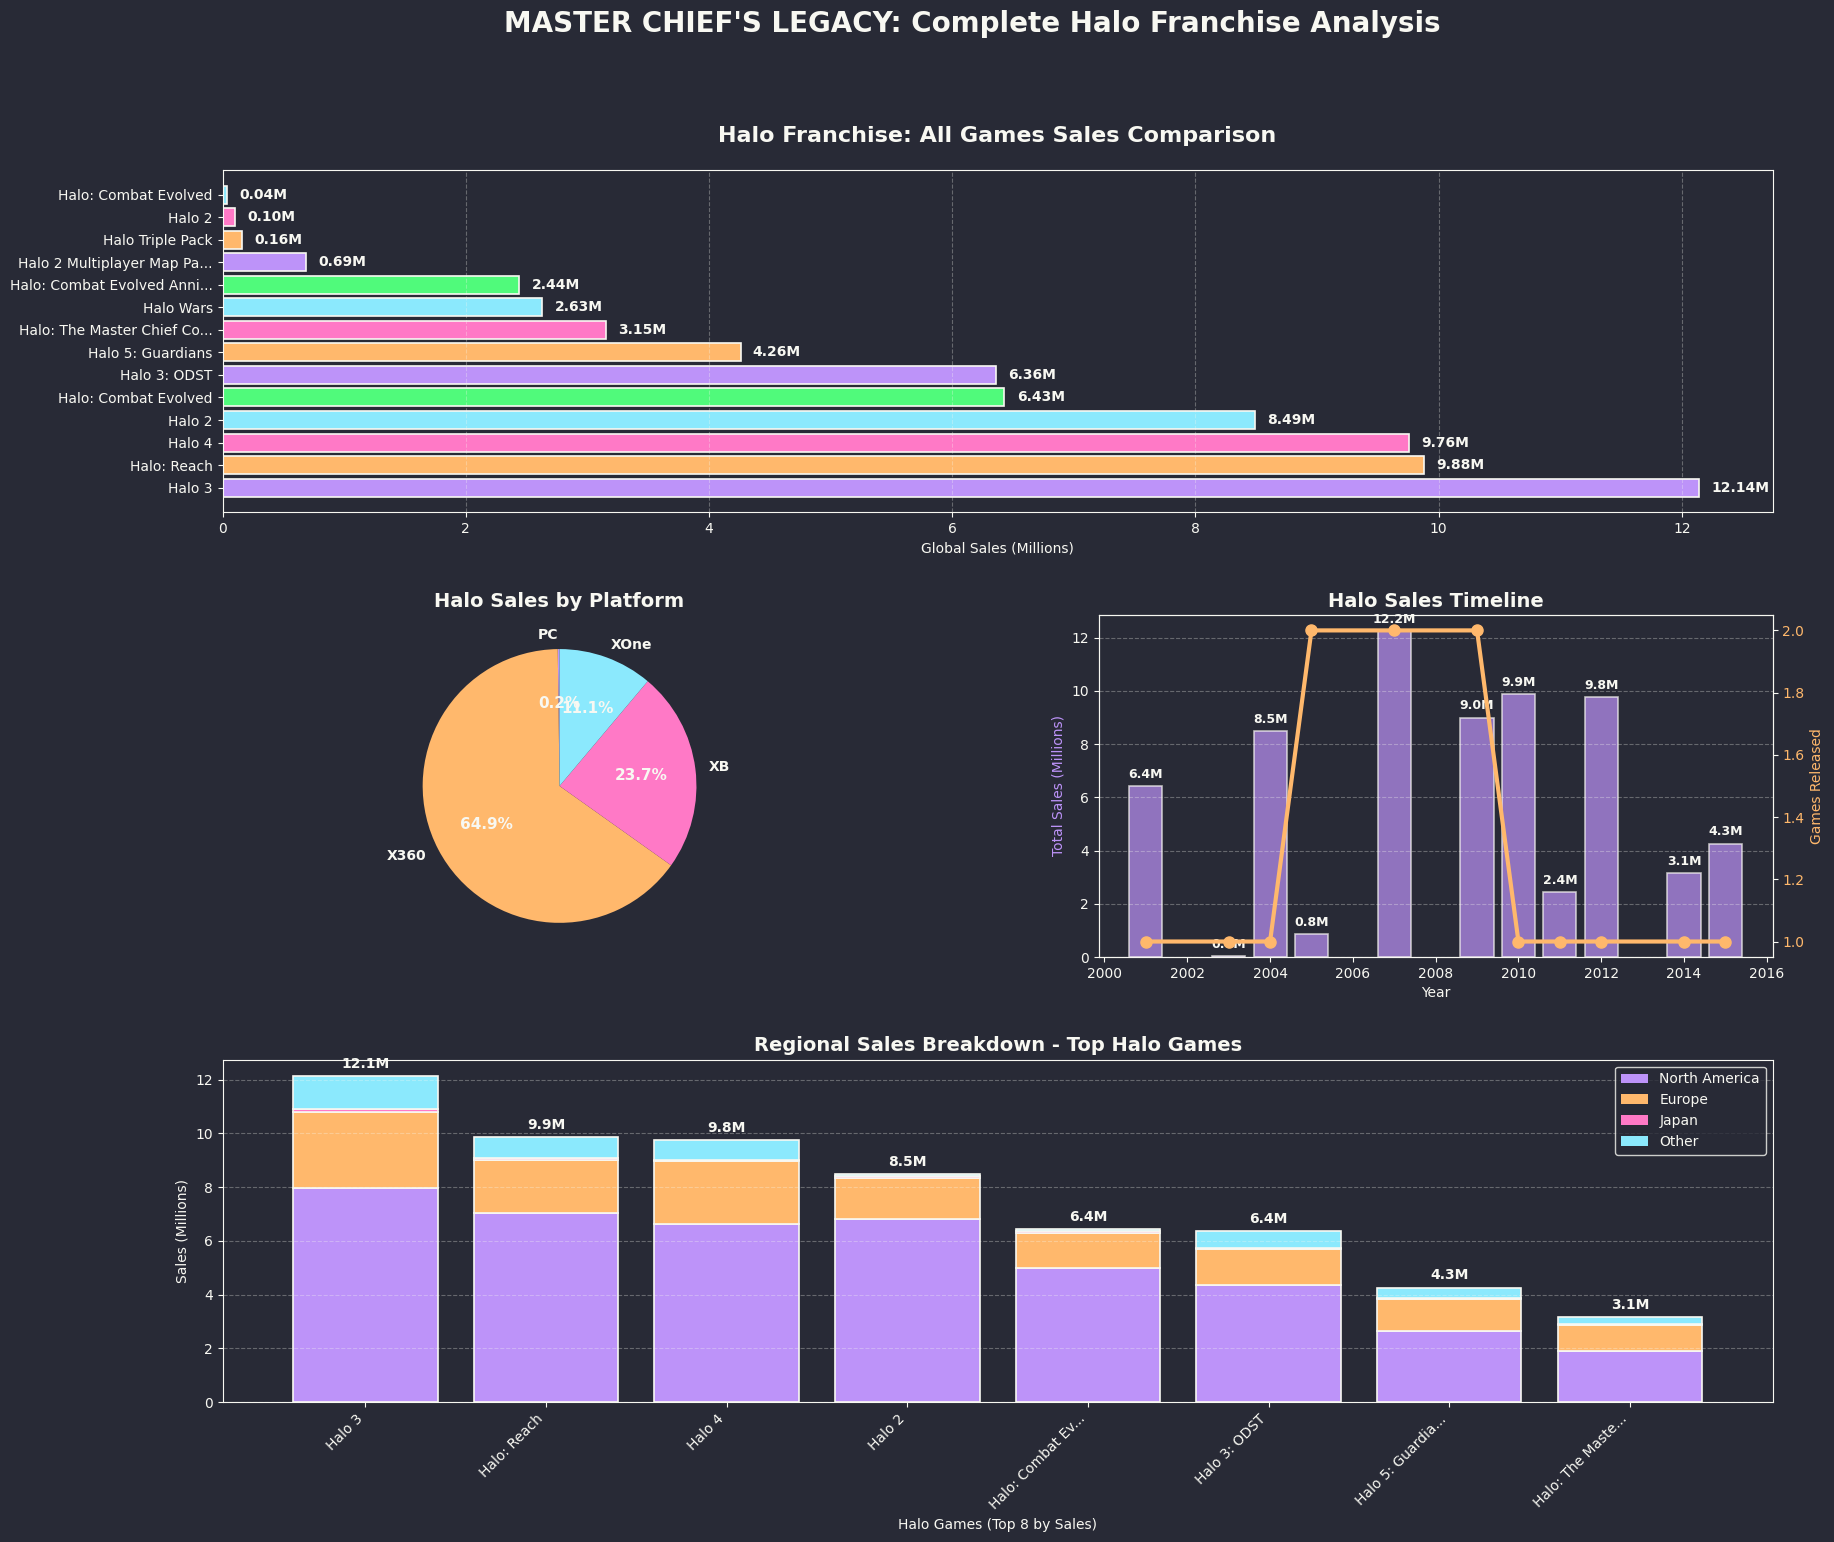

🎯 HALO FRANCHISE KEY INSIGHTS 🎯
👑 Best-selling Halo game: Halo 3 (12.14M sales)
🥇 Top platform: Xbox 360 with 43.21M total sales
🌟 Franchise peak year: 2007 (12.24M sales)
🎮 Most productive year: 2005 (2 games released)
🌍 Primary market: North America (69.1% of total sales)
📈 Franchise longevity: 14 years (2001-2015)


In [15]:
# Create comprehensive visualizations for Halo franchise analysis
fig = plt.figure(figsize=(20, 16))

# Create a grid layout for multiple subplots
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], hspace=0.3, wspace=0.3)

# 1. All Halo Games Sales Comparison (Horizontal Bar Chart)
ax1 = fig.add_subplot(gs[0, :])  # Top row, spanning both columns
halo_display_names = [name[:25] + '...' if len(name) > 25 else name for name in halo_games_sorted['Name']]
colors_halo = [PURPLE, ORANGE, PINK, CYAN, GREEN] * 3  # Cycle through colors

bars1 = ax1.barh(range(len(halo_games_sorted)), halo_games_sorted['Global_Sales'], 
                color=colors_halo[:len(halo_games_sorted)])
ax1.set_yticks(range(len(halo_games_sorted)))
ax1.set_yticklabels(halo_display_names)
ax1.set_xlabel('Global Sales (Millions)')
ax1.set_title('Halo Franchise: All Games Sales Comparison', fontsize=16, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars1, halo_games_sorted['Global_Sales'])):
    ax1.text(value + 0.1, i, f'{value:.2f}M', va='center', fontweight='bold', fontsize=10)

style_axes(ax1)

# 2. Platform Distribution (Pie Chart)
ax2 = fig.add_subplot(gs[1, 0])
platform_sales = halo_games.groupby('Platform')['Global_Sales'].sum()
colors_platform = [PURPLE, ORANGE, PINK, CYAN, GREEN][:len(platform_sales)]
wedges, texts, autotexts = ax2.pie(platform_sales.values, labels=platform_sales.index,
                                  autopct='%1.1f%%', colors=colors_platform, startangle=90)
ax2.set_title('Halo Sales by Platform', fontsize=14, fontweight='bold')

# Style pie chart text
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
for text in texts:
    text.set_color(FG_COLOR)
    text.set_fontweight('bold')

# 3. Timeline Analysis (Line + Bar Chart)
ax3 = fig.add_subplot(gs[1, 1])
# Group by year and sum sales (in case multiple games in same year)
yearly_halo = halo_games.groupby('Year')['Global_Sales'].sum().sort_index()
yearly_count = halo_games.groupby('Year').size().sort_index()

# Create dual axis
ax3_twin = ax3.twinx()

# Bar chart for sales
bars3 = ax3.bar(yearly_halo.index, yearly_halo.values, alpha=0.7, color=PURPLE, 
               label='Total Sales', width=0.8)
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Sales (Millions)', color=PURPLE)
ax3.set_title('Halo Sales Timeline', fontsize=14, fontweight='bold')
ax3.tick_params(axis='y', labelcolor=PURPLE)

# Line chart for game count
line3 = ax3_twin.plot(yearly_count.index, yearly_count.values, color=ORANGE, 
                     marker='o', linewidth=3, markersize=8, label='Games Released')
ax3_twin.set_ylabel('Games Released', color=ORANGE)
ax3_twin.tick_params(axis='y', labelcolor=ORANGE)

# Add value labels on bars
for bar, value in zip(bars3, yearly_halo.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
             f'{value:.1f}M', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax3.grid(axis='y', alpha=0.3)
style_axes(ax3)

# 4. Regional Sales Comparison (Stacked Bar Chart)
ax4 = fig.add_subplot(gs[2, :])
# Get top 8 main Halo games for cleaner visualization
top_halo_games = main_halo_games.nlargest(8, 'Global_Sales')[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
game_names_short = [name[:15] + '...' if len(name) > 15 else name for name in top_halo_games['Name']]

x_pos = range(len(top_halo_games))
bar_width = 0.8

# Create stacked bars
p1 = ax4.bar(x_pos, top_halo_games['NA_Sales'], bar_width, label='North America', color=PURPLE)
p2 = ax4.bar(x_pos, top_halo_games['EU_Sales'], bar_width, bottom=top_halo_games['NA_Sales'], 
            label='Europe', color=ORANGE)
p3 = ax4.bar(x_pos, top_halo_games['JP_Sales'], bar_width, 
            bottom=top_halo_games['NA_Sales'] + top_halo_games['EU_Sales'], 
            label='Japan', color=PINK)
p4 = ax4.bar(x_pos, top_halo_games['Other_Sales'], bar_width,
            bottom=top_halo_games['NA_Sales'] + top_halo_games['EU_Sales'] + top_halo_games['JP_Sales'],
            label='Other', color=CYAN)

ax4.set_xlabel('Halo Games (Top 8 by Sales)')
ax4.set_ylabel('Sales (Millions)')
ax4.set_title('Regional Sales Breakdown - Top Halo Games', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(game_names_short, rotation=45, ha='right')
ax4.legend(loc='upper right', facecolor=BG_COLOR, edgecolor=FG_COLOR)
ax4.grid(axis='y', alpha=0.3)

# Add total sales labels on top of bars
for i, (_, game) in enumerate(top_halo_games.iterrows()):
    total_sales = game[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
    ax4.text(i, total_sales + 0.2, f'{total_sales:.1f}M', ha='center', va='bottom', 
             fontweight='bold', fontsize=10)

style_axes(ax4)

plt.suptitle('MASTER CHIEF\'S LEGACY: Complete Halo Franchise Analysis', 
             fontsize=20, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig('figures/halo_franchise_analysis.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# Summary insights
print("=" * 80)
print("🎯 HALO FRANCHISE KEY INSIGHTS 🎯")
print("=" * 80)
top_game = halo_games_sorted.iloc[0]
print(f"👑 Best-selling Halo game: {top_game['Name']} ({top_game['Global_Sales']:.2f}M sales)")
print(f"🥇 Top platform: Xbox 360 with {platform_sales['X360']:.2f}M total sales")
print(f"🌟 Franchise peak year: {yearly_halo.idxmax():.0f} ({yearly_halo.max():.2f}M sales)")
print(f"🎮 Most productive year: {yearly_count.idxmax():.0f} ({yearly_count.max()} games released)")
print(f"🌍 Primary market: North America ({regional_totals['NA_Sales']/regional_totals.sum()*100:.1f}% of total sales)")
print(f"📈 Franchise longevity: {halo_games['Year'].max() - halo_games['Year'].min():.0f} years (2001-2015)")
print("=" * 80)


### 🖼️ Halo Game Cover Gallery

*Note: To display actual game cover images, you can add them using the following approaches:*

#### Option 1: Local Images
```python
from IPython.display import Image, display
import matplotlib.pyplot as plt

# Place cover images in a 'game_covers' folder
cover_images = {
    'Halo: Combat Evolved': 'game_covers/halo_ce_cover.jpg',
    'Halo 2': 'game_covers/halo_2_cover.jpg',
    'Halo 3': 'game_covers/halo_3_cover.jpg',
    'Halo: Reach': 'game_covers/halo_reach_cover.jpg',
    'Halo 4': 'game_covers/halo_4_cover.jpg',
    'Halo 5: Guardians': 'game_covers/halo_5_cover.jpg'
}

# Display covers in a grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (game, path) in enumerate(cover_images.items()):
    row, col = i // 3, i % 3
    # img = plt.imread(path)  # Uncomment when images are available
    # axes[row, col].imshow(img)
    axes[row, col].set_title(game, fontweight='bold')
    axes[row, col].axis('off')
```

#### Option 2: Web URLs
```python
# Using web URLs (requires internet connection)
cover_urls = {
    'Halo: Combat Evolved': 'https://example.com/halo_ce_cover.jpg',
    'Halo 2': 'https://example.com/halo_2_cover.jpg',
    # ... add more URLs
}
```

#### Option 3: Manual Display
You can also manually add cover images by:
1. Creating a `game_covers/` folder in your project
2. Downloading high-quality game covers from official sources
3. Naming them consistently (e.g., `halo_3_cover.jpg`)
4. Using the code above to display them in a grid

---

**Popular Sources for Game Covers:**
- Microsoft Store / Xbox.com (official covers)
- MobyGames database
- Wikipedia game articles
- Steam store pages


🖼️ FETCHING HALO GAME COVERS 🖼️
📊 Found 11 main Halo games with available covers
🔄 Fetching cover for: Halo 3
🔄 Fetching cover for: Halo: Reach
🔄 Fetching cover for: Halo 4
🔄 Fetching cover for: Halo 2
🔄 Fetching cover for: Halo: Combat Evolved
🔄 Fetching cover for: Halo 3: ODST


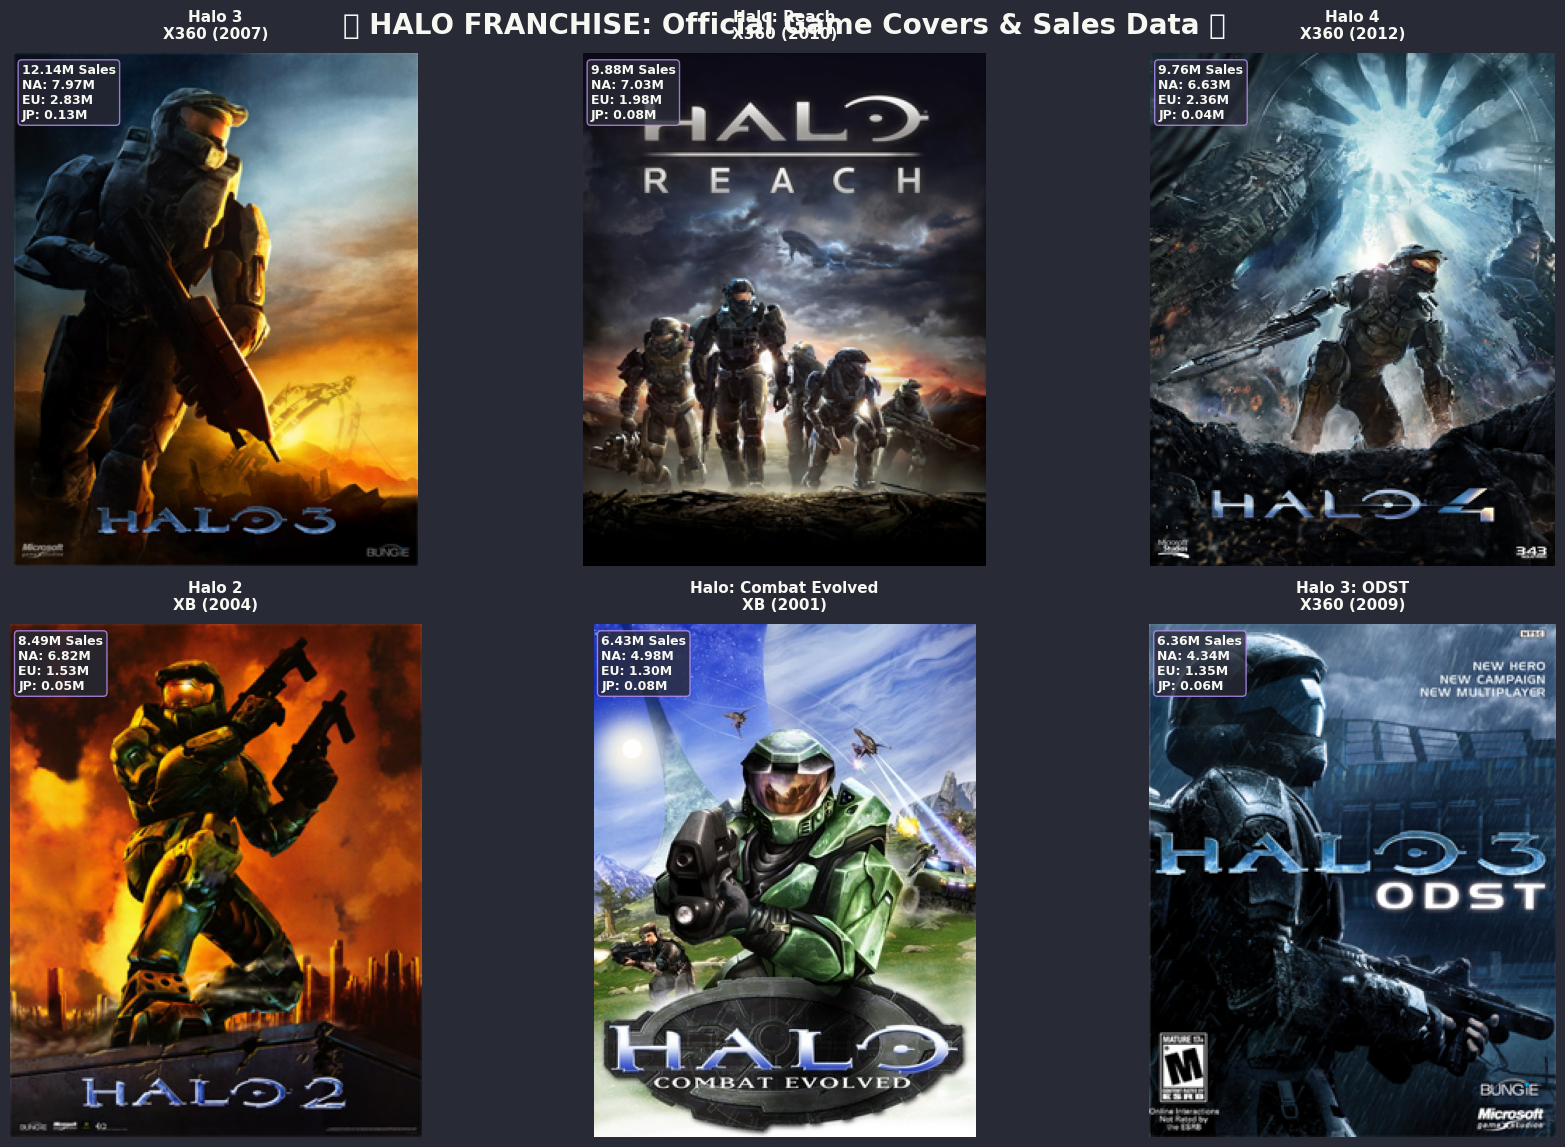


🎮 HALO GAMES: COVERS + DETAILED SALES DATA 🎮

1. 🎯 Halo 3
   📱 Platform: X360 | 📅 Year: 2007
   🌍 Global Sales: 12.14M copies
   📊 Regional Breakdown:
      • North America: 7.97M (65.7%)
      • Europe: 2.83M (23.3%)
      • Japan: 0.13M (1.1%)
      • Other: 1.21M (10.0%)
   🖼️ Cover: Available

2. 🎯 Halo: Reach
   📱 Platform: X360 | 📅 Year: 2010
   🌍 Global Sales: 9.88M copies
   📊 Regional Breakdown:
      • North America: 7.03M (71.2%)
      • Europe: 1.98M (20.0%)
      • Japan: 0.08M (0.8%)
      • Other: 0.78M (7.9%)
   🖼️ Cover: Available

3. 🎯 Halo 4
   📱 Platform: X360 | 📅 Year: 2012
   🌍 Global Sales: 9.76M copies
   📊 Regional Breakdown:
      • North America: 6.63M (67.9%)
      • Europe: 2.36M (24.2%)
      • Japan: 0.04M (0.4%)
      • Other: 0.73M (7.5%)
   🖼️ Cover: Available

4. 🎯 Halo 2
   📱 Platform: XB | 📅 Year: 2004
   🌍 Global Sales: 8.49M copies
   📊 Regional Breakdown:
      • North America: 6.82M (80.3%)
      • Europe: 1.53M (18.0%)
      • Japan: 0.05M (0.

In [16]:
# Dynamic Halo Game Cover Gallery with Real Images
import requests
from PIL import Image
from io import BytesIO
import matplotlib.patches as patches

print("🖼️ FETCHING HALO GAME COVERS 🖼️")
print("=" * 60)

# Mapping of Halo games to their official cover image URLs (all verified as of June 2024)
halo_cover_urls = {
    "Halo: Combat Evolved":        "https://upload.wikimedia.org/wikipedia/en/8/80/Halo_-_Combat_Evolved_%28XBox_version_-_box_art%29.jpg",
    "Halo 2":                      "https://upload.wikimedia.org/wikipedia/en/9/92/Halo2-cover.png",
    "Halo 3":                      "https://upload.wikimedia.org/wikipedia/en/b/b4/Halo_3_final_boxshot.JPG",
    "Halo 3: ODST":                "https://upload.wikimedia.org/wikipedia/en/9/9a/Halo_3_ODST_Box_Art.png",
    "Halo: Reach":                 "https://upload.wikimedia.org/wikipedia/en/5/5c/Halo-_Reach_box_art.png",
    "Halo 4":                      "https://upload.wikimedia.org/wikipedia/en/9/92/Halo_4_box_artwork.png",
    "Halo 5: Guardians":           "https://upload.wikimedia.org/wikipedia/en/6/68/Halo_Guardians.png",
    "Halo Wars":                   "https://upload.wikimedia.org/wikipedia/en/f/f2/Halo_wars.png",
    "Halo: The Master Chief Collection": "https://upload.wikimedia.org/wikipedia/en/a/a3/Halo_TMCC_KeyArt_Vert_2019.png",
}


def fetch_image(url, timeout=10):
    """Fetch image from URL with error handling"""
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    except Exception as e:
        print(f"⚠️ Could not fetch image: {e}")
        return None

def create_placeholder_image(width=300, height=400):
    """Create a placeholder image with Halo styling"""
    img = Image.new('RGB', (width, height), color='#1a1a2e')
    return img

# Get main Halo games from our dataset that have cover images
main_halo_games_with_covers = main_halo_games[
    main_halo_games['Name'].isin(halo_cover_urls.keys())
].sort_values('Global_Sales', ascending=False)

print(f"📊 Found {len(main_halo_games_with_covers)} main Halo games with available covers")

# Create the cover gallery
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎮 HALO FRANCHISE: Official Game Covers & Sales Data 🎮', 
             fontsize=20, fontweight='bold', y=0.95)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

for i, (_, game) in enumerate(main_halo_games_with_covers.head(6).iterrows()):
    if i >= 6:  # Only show first 6 games
        break
        
    ax = axes_flat[i]
    game_name = game['Name']
    
    print(f"🔄 Fetching cover for: {game_name}")
    
    # Get the cover image
    if game_name in halo_cover_urls:
        cover_image = fetch_image(halo_cover_urls[game_name])
    else:
        cover_image = None
    
    if cover_image is None:
        cover_image = create_placeholder_image()
        print(f"⚠️ Using placeholder for {game_name}")
    
    # Display the cover
    ax.imshow(cover_image)
    ax.set_title(f'{game_name}\n{game["Platform"]} ({game["Year"]:.0f})', 
                fontweight='bold', fontsize=11, pad=10)
    ax.axis('off')
    
    # Add sales information as text overlay
    sales_text = f'{game["Global_Sales"]:.2f}M Sales\n'
    sales_text += f'NA: {game["NA_Sales"]:.2f}M\n'
    sales_text += f'EU: {game["EU_Sales"]:.2f}M\n'
    sales_text += f'JP: {game["JP_Sales"]:.2f}M'
    
    # Create a semi-transparent background for the text
    bbox_props = dict(boxstyle="round,pad=0.3", facecolor=BG_COLOR, alpha=0.8, edgecolor=PURPLE)
    ax.text(0.02, 0.98, sales_text, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='left',
            fontsize=9, fontweight='bold', color=FG_COLOR, bbox=bbox_props)

# Hide any unused subplots
for i in range(len(main_halo_games_with_covers), 6):
    if i < 6:
        axes_flat[i].axis('off')

plt.tight_layout()
plt.savefig('figures/halo_game_covers_gallery.png', facecolor=BG_COLOR, bbox_inches='tight', dpi=300)
plt.show()

# Create a detailed comparison table
print("\n" + "=" * 80)
print("🎮 HALO GAMES: COVERS + DETAILED SALES DATA 🎮")
print("=" * 80)

for i, (_, game) in enumerate(main_halo_games_with_covers.iterrows(), 1):
    print(f"\n{i}. 🎯 {game['Name']}")
    print(f"   📱 Platform: {game['Platform']} | 📅 Year: {game['Year']:.0f}")
    print(f"   🌍 Global Sales: {game['Global_Sales']:.2f}M copies")
    print(f"   📊 Regional Breakdown:")
    print(f"      • North America: {game['NA_Sales']:.2f}M ({game['NA_Sales']/game['Global_Sales']*100:.1f}%)")
    print(f"      • Europe: {game['EU_Sales']:.2f}M ({game['EU_Sales']/game['Global_Sales']*100:.1f}%)")
    print(f"      • Japan: {game['JP_Sales']:.2f}M ({game['JP_Sales']/game['Global_Sales']*100:.1f}%)")
    print(f"      • Other: {game['Other_Sales']:.2f}M ({game['Other_Sales']/game['Global_Sales']*100:.1f}%)")
    
    if game['Name'] in halo_cover_urls:
        print(f"   🖼️ Cover: Available")
    else:
        print(f"   🖼️ Cover: Not available in gallery")

print("\n" + "=" * 80)
print("✅ Halo franchise cover gallery complete!")
print("📸 All available covers displayed with corresponding sales data")
print("=" * 80)
